## Exploratory Analysis

In [55]:
%matplotlib inline
import pandas as pd
import ydata_profiling as pp
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('https://raw.githubusercontent.com/ShamerOC/ml/main/healthcare-dataset-stroke-data.csv')

print(data.shape)

(5110, 12)


In [57]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [58]:
print(data.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [59]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Dropujemy ID - ta kolumna nie jest nam potrzebna

In [60]:
data = data.drop(columns=['id'])
data.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


Zamieniamy objecty na wartości numeryczne

In [61]:
data = data.replace({"Private": 1, "Self-employed": 0, "Govt_job": 2, "Never_worked": 3, "children": 4})
data = data.replace({"Urban": 1, "Rural": 0})
data = data.replace({"Yes": 1, "No": 0})
data = data.replace({"Male": 1, "Female": 0, "Other": 2})
data = data.replace({"formerly smoked": 1, "smokes": 2, "never smoked": 0, "Unknown": 0.5})

Sprawdzamy nulle

In [62]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Usuwamy nulle

In [63]:
data = data.dropna()
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [64]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1.0,1
2,1,80.0,0,1,1,1,0,105.92,32.5,0.0,1
3,0,49.0,0,0,1,1,1,171.23,34.4,2.0,1
4,0,79.0,1,0,1,0,0,174.12,24.0,0.0,1
5,1,81.0,0,0,1,1,1,186.21,29.0,1.0,1


Czy wszystkie kolumny reprezentowane są jako kolumny numeryczne

In [65]:
data.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status       float64
stroke                 int64
dtype: object

Zmieniamy typ z object na int64

In [66]:
print("Data types and their frequency\n{}".format(data.dtypes.value_counts()))

Data types and their frequency
int64      7
float64    4
Name: count, dtype: int64


Teraz możemy ustalić nasze X i y

In [67]:
X = data.drop("stroke", axis=1)
y = data["stroke"]

In [68]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,1,228.69,36.6,1.0
2,1,80.0,0,1,1,1,0,105.92,32.5,0.0
3,0,49.0,0,0,1,1,1,171.23,34.4,2.0
4,0,79.0,1,0,1,0,0,174.12,24.0,0.0
5,1,81.0,0,0,1,1,1,186.21,29.0,1.0


In [69]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [70]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Krótka analiza raportu pandas

Jak możemy zauważyć z raportu pandas, wiek pacjentów wacha się od 0 (noworodki) aż do 82 roku życia.
To czy ktoś miał zawał, jest najmocniej skorelowane z wiekiem, a nie na BMI.
Co ciekawe, poziom glukozy we krwi jest podobnie skorelowany z zawałem, jak palenie papierosów.


# Tworzenie Pipeline

Stwórzmy następujące pipeline:

- dla SVM z jądrem rbf
- dla SVM z jądrem poly
- dla SVM liniowego
- dla regresji logistycznej
- dla random forest

In [71]:
svm_pipeline = Pipeline([('scale', StandardScaler()),
                                 ('classifier', SVC())])

logistic_pipeline = Pipeline([('scale', StandardScaler()),
                                 ('classifier', LogisticRegression(random_state=42))])

random_forest_pipeline = Pipeline([('scale', StandardScaler()),
                                   ('classifier', RandomForestClassifier())])

Splitujemy dataset na train i test

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)

(3681, 10)
(3681,)


Ponieważ nasz dataset jest dość niezablansowany (mamy 209 stroke = true, oraz 4700 stroke = false), dorabiamy dane za pomocą SMOTE

In [73]:
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())
print("Ilość pozytywnych przed SMOTE: " + str(sum(y_train)))
print("Ilość pozytywnych po SMOTE: " + str(sum(y_train_resh)))
print("Ilość wszystkich po SMOTE: " + str(y_train_resh.size))

Ilość pozytywnych przed SMOTE: 160
Ilość pozytywnych po SMOTE: 3521
Ilość wszystkich po SMOTE: 7042


Jak widzimy, dzięki SMOTE zagęściliśmy ilość Y, obecnie mamy równy podział 50% case pozytywnych i 50% negatywnych

Najpierw zdefiniujmy param_gridy

In [74]:
svm_param_grid = {
    'classifier__gamma': [1],
    'classifier__C': [1],
    'classifier__kernel': ['rbf', 'poly', 'linear']
}

logistic_param_grid = {
      'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

random_forest_param_grid = {
    'classifier__n_estimators': [8, 16],
    'classifier__max_leaf_nodes': [10, 25]
}


Po utworzeniu pipeline i param gridów, możemy się wziąć za tworzenie GridSearch - najpierw zróbmy dla wersji bez SMOTE

In [75]:
svm_rbf_grid_search_no_smote = GridSearchCV(svm_pipeline,
                                  param_grid=svm_param_grid,
                                  refit=True)

logistic_grid_search_no_smote = GridSearchCV(logistic_pipeline,
                                  param_grid=logistic_param_grid,
                                  refit=True)

random_forest_grid_search_no_smote = GridSearchCV(random_forest_pipeline,
                                  param_grid=random_forest_param_grid,
                                  refit=True)

models_no_smote = {
    "SVM": svm_rbf_grid_search_no_smote,
    "Logistic": logistic_grid_search_no_smote,
    "Random Forest": random_forest_grid_search_no_smote
}

for name, model in models_no_smote.items():
    model.fit(X_train, y_train)
    print(name)
    print(model.best_params_)


SVM
{'classifier__C': 1, 'classifier__gamma': 1, 'classifier__kernel': 'linear'}
Logistic
{'classifier__C': 0.1}
Random Forest
{'classifier__max_leaf_nodes': 10, 'classifier__n_estimators': 8}


Teraz wersja ze SMOTE

In [76]:
svm_rbf_grid_search = GridSearchCV(svm_pipeline,
                                  param_grid=svm_param_grid,
                                  refit=True)

logistic_grid_search = GridSearchCV(logistic_pipeline,
                                  param_grid=logistic_param_grid,
                                  refit=True)

random_forest_grid_search = GridSearchCV(random_forest_pipeline,
                                  param_grid=random_forest_param_grid,
                                  refit=True)

models = {
    "SVM": svm_rbf_grid_search,
    "Logistic": logistic_grid_search,
    "Random Forest": random_forest_grid_search
}

for name, model in models.items():
    model.fit(X_train_resh, y_train_resh)
    print(name)
    print(model.best_params_)


SVM
{'classifier__C': 1, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}
Logistic
{'classifier__C': 0.01}
Random Forest
{'classifier__max_leaf_nodes': 25, 'classifier__n_estimators': 8}


Interpretacja wyników - bez SMOTE

In [77]:
columns = ["model", "accuracy", "f1", "recall", "precision"]

In [78]:
data = []
predicted = {}

for name, model in models_no_smote.items():
    y_test_predicted = model.predict(X_test)
    predicted[name] = y_test_predicted
    data.append([name,
                 metrics.accuracy_score(y_true=y_test, y_pred=y_test_predicted),
                 metrics.f1_score(y_true=y_test, y_pred=y_test_predicted),
                 metrics.recall_score(y_true=y_test, y_pred=y_test_predicted),
                 metrics.precision_score(y_true=y_test, y_pred=y_test_predicted)])


results = pd.DataFrame(data, columns=columns)

print(results)

           model  accuracy   f1  recall  precision
0            SVM  0.960098  0.0     0.0        0.0
1       Logistic  0.960098  0.0     0.0        0.0
2  Random Forest  0.960098  0.0     0.0        0.0


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Wersja ze SMOTE

In [79]:
data = []
predicted = {}

for name, model in models.items():
    y_test_predicted = model.predict(X_test)
    predicted[name] = y_test_predicted
    data.append([name,
                 metrics.accuracy_score(y_true=y_test, y_pred=y_test_predicted),
                 metrics.f1_score(y_true=y_test, y_pred=y_test_predicted),
                 metrics.recall_score(y_true=y_test, y_pred=y_test_predicted),
                 metrics.precision_score(y_true=y_test, y_pred=y_test_predicted)])


results = pd.DataFrame(data, columns=columns)
print(results)

           model  accuracy        f1    recall  precision
0            SVM  0.859935  0.165049  0.346939   0.108280
1       Logistic  0.772801  0.186589  0.653061   0.108844
2  Random Forest  0.820847  0.185185  0.510204   0.113122


Jak możemy zauważyć wersja bez SMOTE jest dużo słabsza niż wersja ze SMOTE, dzięki dodaniu dużej ilości pozytywnych przypadków, możemy stworzyć dużo lepszy model.

Model: SVM
Model: Logistic
Model: Random Forest


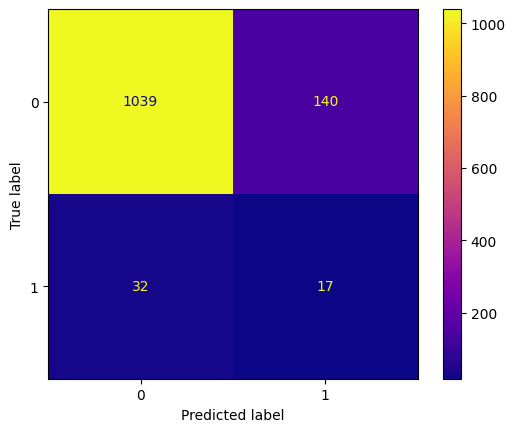

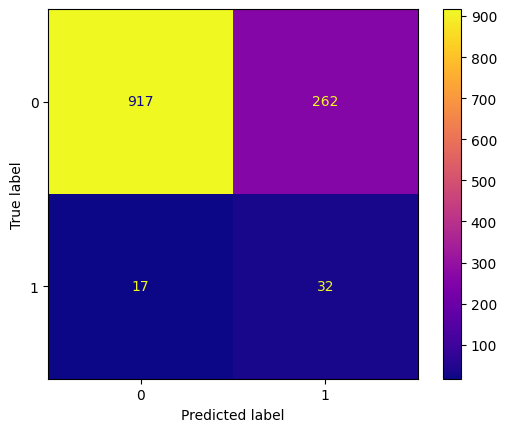

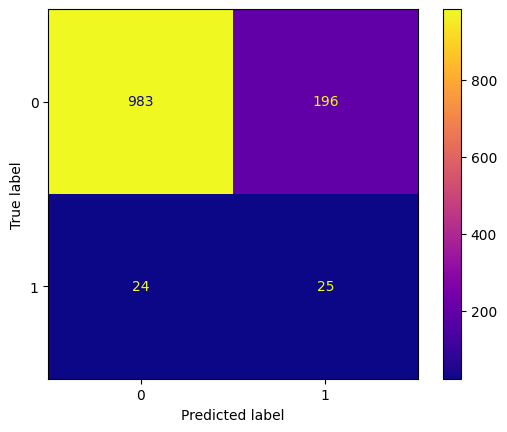

In [80]:
for name, y_pred in predicted.items():
    print("Model: " + name)
    ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, cmap='plasma')

plt.show()

# Podsumowanie

Ze zbioru danych, którego dane były dość mocno zniekształcone, dzięki wizualizacji udało nam się je wyczyścić i doprowadzić do dopuszczalnej formy.
Następnie nauczyliśmy kilka najbardziej znanych modeli uczenia maszynowego na podstawie tych danych w dwóch wariancjach - jedna ze SMOTE, druga bez.
Możemy zauważyć, że model oparty o SVM i SMOTE sprawdził się najlepiej (wg. accuracy), lecz kiedy spojrzymy na Confusion Matrix, zobaczymy, ze ten model stworzył najwięcej najbardziej niebezpiecznych predykcji (naprawdę pacjent był chory, a model przewidział, że nie jest).
Jezeli chcielibyśmy uniknąć tego problemu, nalezałoby wybrać inny model